In [146]:
#import the libraries
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import cv2
import Augmentor
import os

In [151]:
path_r = 'C:/Users/Ramnath/Downloads/Animal/animals/animals/rat/output'
path_f = 'C:/Users/Ramnath/Downloads/Fire/fire_dataset/fire_images'
path_h = 'C:/Users/Ramnath/Downloads/human/human detection dataset/1'
Rats = []
Fire = []
Human = []
f = 0
r = 0
h = 0
for i in os.scandir(path_r):
    img = cv2.imread(i.path)
    img = cv2.resize(img, (128, 128))
    Rats.append(img)
    r = r + 1
for i in os.scandir(path_f):
    img = cv2.imread(i.path)
    img = cv2.resize(img, (128, 128))
    Fire.append(img)
    f = f + 1

for i in os.scandir(path_h):
    img = cv2.imread(i.path)
    img = cv2.resize(img, (128, 128))
    Human.append(img)
    h = h + 1

print(r)
print(f)
print(h)

700
755
340


In [150]:
# Rats1 = []
# for i in range(Rats.shape[0]):
#     img = Rats[i]
#     Rats1.append(img[::-1, :, :]) #Upside down
#     Rats1.append(img[:, ::-1, :]) #lateral inversion
p = Augmentor.Pipeline(path_r)
p.flip_left_right(probability=0.4)

p.flip_top_bottom(probability=0.8)

p.rotate90(probability=0.1)
num_of_samples = 700

# Now we can sample from the pipeline:
p.sample(num_of_samples)

Initialised with 60 image(s) found.
Output directory set to C:/Users/Ramnath/Downloads/Animal/animals/animals/rat\output.

Processing <PIL.Image.Image image mode=RGB size=1600x1222 at 0x21C8A1CFF70>: 100%|██████████| 700/700 [00:04<00:00, 148.70 Samples/s]                  


In [149]:
p

In [152]:
Rats = np.array(Rats)
Fire = np.array(Fire)
Human = np.array(Human)
print(Rats.shape, Fire.shape, Human.shape)

(700, 128, 128, 3) (755, 128, 128, 3) (340, 128, 128, 3)


In [153]:
X = np.concatenate((Rats, Fire, Human), axis = 0)
print(X.shape)

(1795, 128, 128, 3)


In [102]:
classes = ['Rats', 'Fire', 'Human']

In [154]:
Y = []
for i in range(1795):
    Y.append(0)
for i in range(700,1456):
    Y[i] = 1
for i in range(1456,1795):
    Y[i] = 2
Y = np.array(Y)

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 3, test_size = 0.1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1615, 128, 128, 3) (180, 128, 128, 3) (1615,) (180,)


In [156]:
def plot_sample(X, Y, index):
    plt.imshow(X[index][:,:,::-1])
    plt.xlabel(classes[int(Y[index])])

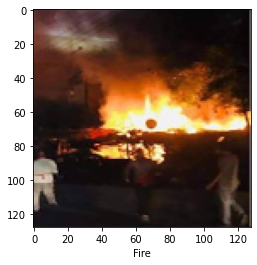

In [157]:
plot_sample(X_train, Y_train, 135)

In [158]:
X_train = X_train / 255
X_test = X_test / 255

In [159]:
cnn = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation = 'relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

cnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 64)       

In [160]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='finalModel3.h5', 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

In [161]:
cnn.compile(optimizer=keras.optimizers.Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=50, callbacks=callbacks)


Epoch 1/50
51/51 [==============================] - 16s 286ms/step - loss: 0.8105 - accuracy: 0.6285 - val_loss: 0.6871 - val_accuracy: 0.7389

Epoch 00001: val_loss improved from inf to 0.68715, saving model to finalModel3.h5
Epoch 2/50
51/51 [==============================] - 14s 280ms/step - loss: 0.5381 - accuracy: 0.7498 - val_loss: 0.5330 - val_accuracy: 0.7556

Epoch 00002: val_loss improved from 0.68715 to 0.53304, saving model to finalModel3.h5
Epoch 3/50
51/51 [==============================] - 14s 280ms/step - loss: 0.4494 - accuracy: 0.7981 - val_loss: 0.5409 - val_accuracy: 0.7611

Epoch 00003: val_loss did not improve from 0.53304
Epoch 4/50
51/51 [==============================] - 14s 281ms/step - loss: 0.3446 - accuracy: 0.8687 - val_loss: 0.3852 - val_accuracy: 0.8778

Epoch 00004: val_loss improved from 0.53304 to 0.38519, saving model to finalModel3.h5
Epoch 5/50
51/51 [==============================] - 15s 288ms/step - loss: 0.3125 - accuracy: 0.8854 - val_loss: 0.3

In [162]:
cnn.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 65ms/step - loss: 0.2158 - accuracy: 0.9500


[0.21577413380146027, 0.949999988079071]

In [163]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[6.9000266e-02, 6.5672792e-02, 8.6532688e-01],
       [4.4196966e-10, 9.9999976e-01, 1.9305952e-07],
       [3.3042085e-32, 1.0000000e+00, 1.4148155e-17],
       [4.4618753e-19, 1.0000000e+00, 3.2744116e-11],
       [9.9997163e-01, 5.1371285e-07, 2.7943805e-05]], dtype=float32)

In [165]:
Y_classes = [np.argmax(element) for element in y_pred]
Y_classes[:10]

[2, 1, 1, 1, 0, 1, 0, 1, 2, 0]

In [166]:
Y_test[:10]

array([2, 1, 1, 1, 0, 1, 0, 1, 2, 0])

In [167]:
print("Classification Report: \n", classification_report(Y_test, Y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.93      0.97        76
           2       0.85      0.88      0.87        33

    accuracy                           0.95       180
   macro avg       0.93      0.94      0.93       180
weighted avg       0.95      0.95      0.95       180



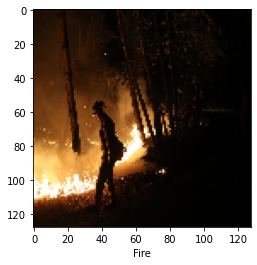

In [168]:
plot_sample(X_test, Y_test, 1)

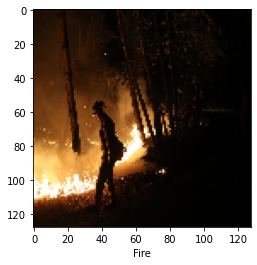

In [169]:
plot_sample(X_test, Y_classes, 1)

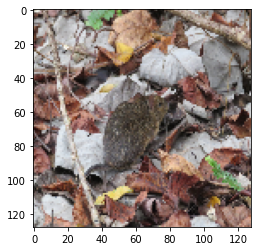

In [250]:
testimg = cv2.imread('rat1.jpg')
testimg = cv2.resize(testimg, (128, 128))
plt.imshow(testimg[:,:,::-1]) 

In [251]:
testimg = np.expand_dims(testimg, axis = 0)
print(testimg.shape)

(1, 128, 128, 3)


In [252]:
result = cnn.predict(testimg/255)
print(result)
index = np.argmax(result)
if result[0][index] < 0.80:
    print("cannot predict")
elif index == 0:
    print('Rats')
elif index == 1:
    print('Fire')
else:
    print('Human')

[[8.3490139e-01 4.0058373e-04 1.6469799e-01]]
Rats


In [176]:
import tensorflow as tf
model = tf.keras.models.load_model('finalModel3.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflmodel = converter.convert()
file = open( 'finalModel3.tflite' , 'wb' ) 
file.write( tflmodel )

INFO:tensorflow:Assets written to: C:\Users\Ramnath\AppData\Local\Temp\tmpvko_q37p\assets


INFO:tensorflow:Assets written to: C:\Users\Ramnath\AppData\Local\Temp\tmpvko_q37p\assets


6555464